In [2]:
import pandas as pd
import scipy.stats as stats

# Charger les données
file_path = "C:\\Users\\MM_DATA\\Desktop\\PIST\\Prediction\\Etat_des_sorties_final.xlsx"
data = pd.read_excel(file_path)


In [3]:
# Exclure les colonnes non pertinentes
variables_catégorielles = ['MARKETER', 'DESTINATAIRE', 'PRODUIT', 'TRANSPORTEUR', 'TRACTEUR', 'CITERNE', 'ZONE', 'TYPE DOUANE']

# Effectuer le test d'ANOVA pour chaque variable catégorielle
anova_results = {}
for cat_var in variables_catégorielles:
    anova_result = stats.f_oneway(*[data[data[cat_var] == cat][col] for cat in data[cat_var].unique() for col in ['VOLUME']])
    anova_results[cat_var] = {'F-statistic': anova_result.statistic, 'p-value': anova_result.pvalue}

# Afficher les résultats
for cat_var, result in anova_results.items():
    print(f"Test d'ANOVA pour la variable '{cat_var}':")
    print("Statistique F :", result['F-statistic'])
    print("p-value :", result['p-value'])


Test d'ANOVA pour la variable 'MARKETER':
Statistique F : 1281.190711379927
p-value : 0.0
Test d'ANOVA pour la variable 'DESTINATAIRE':
Statistique F : 586.8480063454238
p-value : 0.0
Test d'ANOVA pour la variable 'PRODUIT':
Statistique F : 47187.82179931995
p-value : 0.0
Test d'ANOVA pour la variable 'TRANSPORTEUR':
Statistique F : 481.4039314101309
p-value : 0.0
Test d'ANOVA pour la variable 'TRACTEUR':
Statistique F : 2369.2099517567935
p-value : 0.0
Test d'ANOVA pour la variable 'CITERNE':
Statistique F : 980.842257535233
p-value : 0.0
Test d'ANOVA pour la variable 'ZONE':
Statistique F : 1261.7223911569517
p-value : 0.0
Test d'ANOVA pour la variable 'TYPE DOUANE':
Statistique F : 42003.61666193666
p-value : 0.0


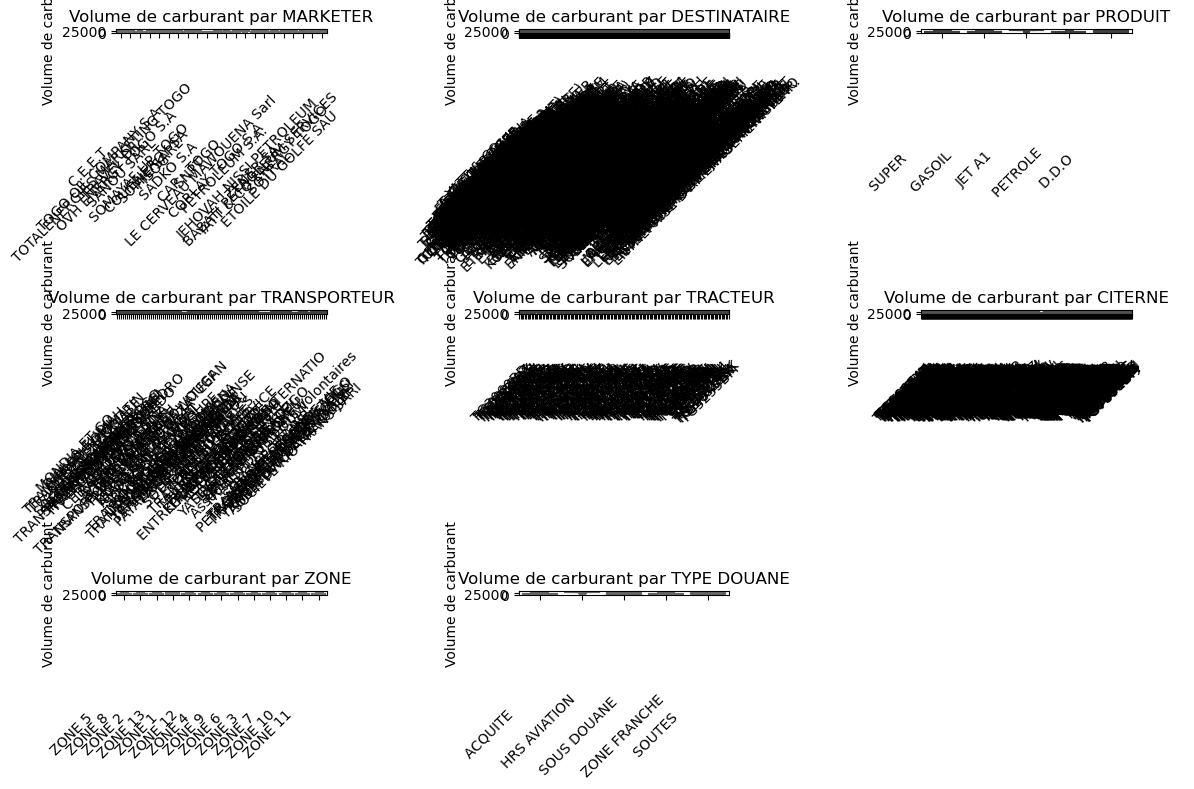

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir une palette de couleurs
palette = sns.color_palette("husl", len(variables_catégorielles))

# Créer des boîtes à moustaches pour chaque variable catégorielle
plt.figure(figsize=(12, 8))
for i, cat_var in enumerate(variables_catégorielles):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=cat_var, y='VOLUME', data=data, palette=[palette[i]])
    plt.title(f'Volume de carburant par {cat_var}')
    plt.xlabel('')
    plt.ylabel('Volume de carburant')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
# Calculer les coefficients de corrélation de point bisériale pour les variables catégorielles
correlation_coefficients = {}
for cat_var in variables_catégorielles:
    correlation = data.groupby(cat_var)['VOLUME'].mean().corr(data.groupby(cat_var)['VOLUME'].mean())
    correlation_coefficients[cat_var] = correlation

# Classer les variables par ordre croissant de coefficient de corrélation
sorted_correlation_coefficients = sorted(correlation_coefficients.items(), key=lambda x: abs(x[1]))

# Afficher les résultats
print("Variables catégorielles classées par ordre croissant de leur corrélation avec les volumes de carburant :")
for var, coef in sorted_correlation_coefficients:
    print(f"{var}: {coef}")


Variables catégorielles classées par ordre croissant de leur corrélation avec les volumes de carburant :
MARKETER: 1.0
DESTINATAIRE: 1.0
PRODUIT: 1.0
TRANSPORTEUR: 1.0
TRACTEUR: 1.0
CITERNE: 1.0
ZONE: 1.0
TYPE DOUANE: 1.0


C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_9464\1339441179.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


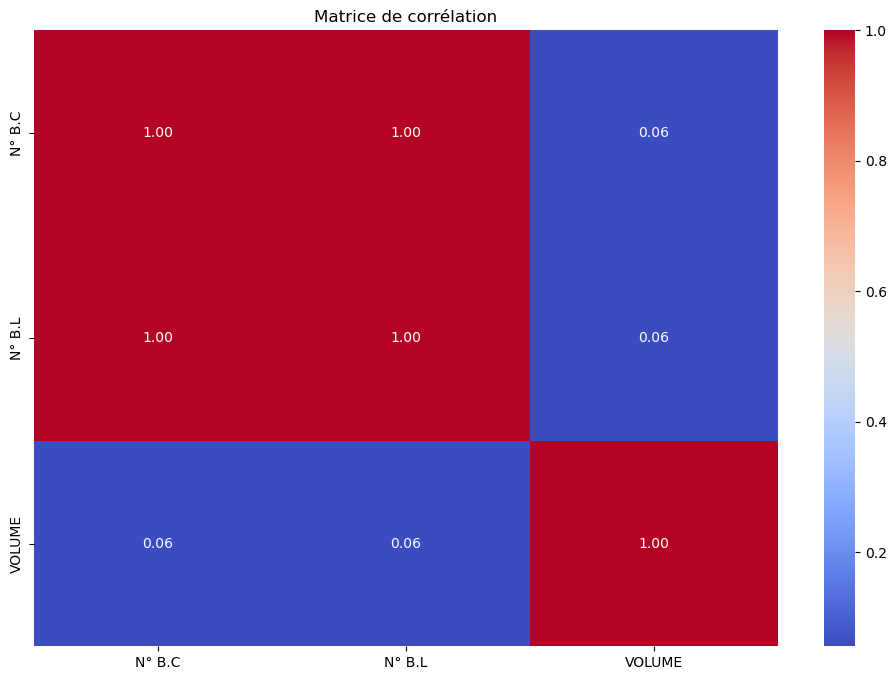

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
correlation_matrix = data.corr()

# Afficher la matrice de corrélation avec un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_9464\4190189369.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_data[['VOLUME', column]].corr()
C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_9464\4190189369.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_data[['VOLUME', column]].corr()
C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_9464\4190189369.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_

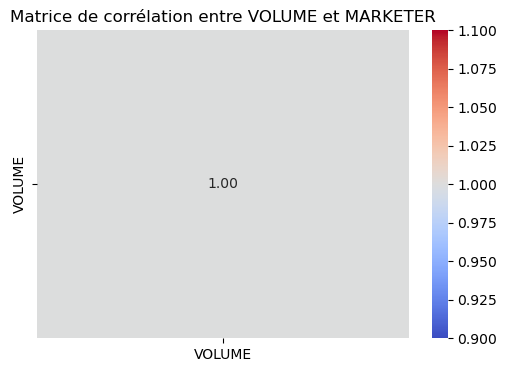

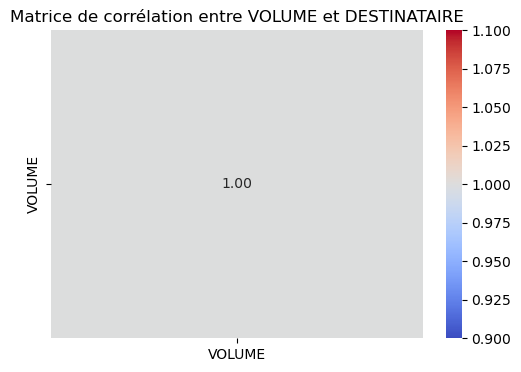

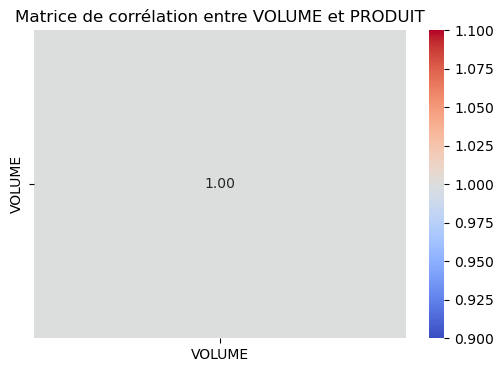

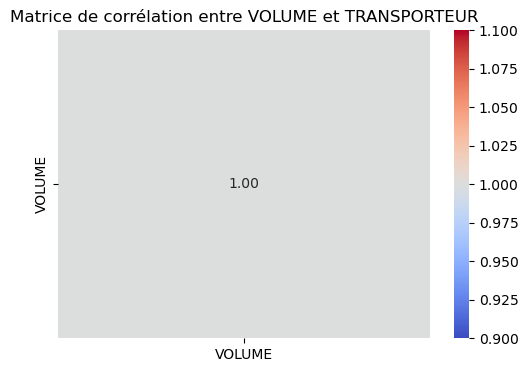

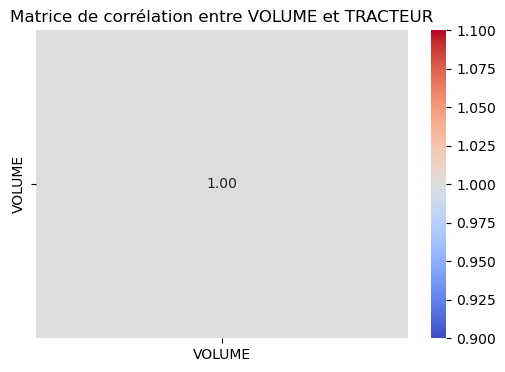

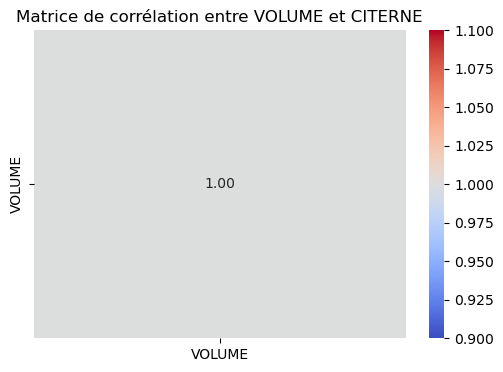

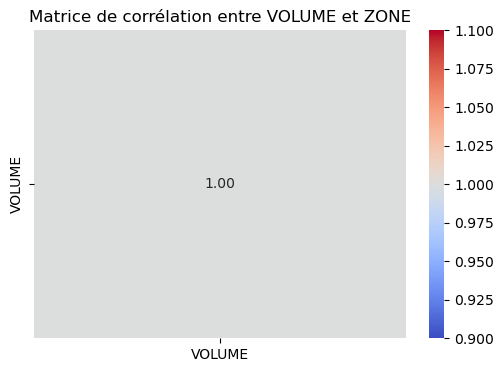

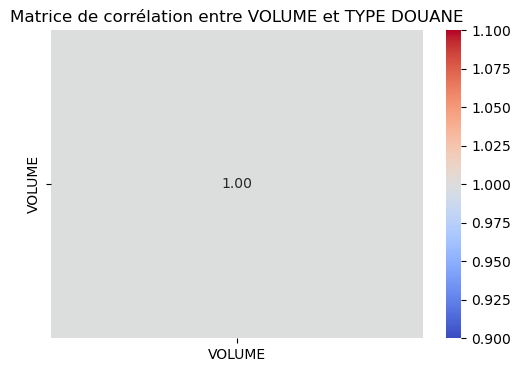

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Sélectionner seulement les colonnes avec lesquelles nous voulons calculer la corrélation
selected_columns = ['VOLUME', 'MARKETER', 'DESTINATAIRE', 'PRODUIT', 'TRANSPORTEUR', 'TRACTEUR', 'CITERNE', 'ZONE', 'TYPE DOUANE']
selected_data = data[selected_columns]

# Calculer plusieurs matrices de corrélation
correlation_matrices = {}
for column in selected_columns[1:]:  # On commence à l'indice 1 pour exclure 'VOLUME'
    correlation_matrix = selected_data[['VOLUME', column]].corr()
    correlation_matrices[column] = correlation_matrix

# Afficher les matrices de corrélation
for column, matrix in correlation_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Matrice de corrélation entre VOLUME et {column}")
    plt.show()
